In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# storing the data into variable
df = pd.read_csv('/content/drive/MyDrive/HondaHack/1452_cardio_AI.csv', verbose=True, sep = ";")
df2 = pd.read_csv('/content/drive/MyDrive/HondaHack/HondaHackathon_CarProbe.csv', verbose = True)


Tokenization took: 1.31 ms
Type conversion took: 1.14 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 4.33 ms
Type conversion took: 8.22 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df.head(25)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
df.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1441,2025,14393,1,178,76.0,120,90,1,1,0,0,1,0
1442,2027,21909,1,162,90.0,160,90,2,1,0,0,1,1
1443,2028,20497,2,179,106.0,120,80,3,1,0,0,1,1
1444,2029,22644,1,159,58.0,130,80,1,1,0,0,1,0
1445,2031,14590,1,175,65.0,120,80,1,1,0,0,1,1
1446,2032,19808,2,173,72.0,120,70,1,1,0,0,1,0
1447,2034,15176,1,168,56.0,120,80,2,1,0,0,0,0
1448,2035,20572,2,175,71.0,120,80,1,1,0,0,1,0
1449,2038,16670,1,164,78.0,120,80,1,1,0,0,1,0
1450,2041,21709,1,155,58.0,140,90,1,2,0,0,1,0


In [6]:
df2.head(5)

,latitude,local_time,longitude,matched_heading,matched_latitude,matched_link_id,matched_longitude,properties/L/Aircon_ACStatus_Front,properties/L/Aircon_TemperatureSetting_DR,properties/L/Aircon_TemperatureSetting_ValueType,properties/L/Brake_ParkingBrake (IG1PullUp),properties/L/MeterIndicator_ABS,properties/L/SeatBeltReminder_RC,properties/L/SeatBeltReminder_RL,properties/L/SeatBeltReminder_RR,properties/L/SeatbeltStatus_DR,properties/L/SecurityAlarm,properties/O/EngineCoolantTemp,properties/O/FuelLevelRaw,properties/O/VehicleInteriorTemperature,properties/O/distanceToEmpty,properties/O/engineRpm,properties/O/fuelMode,properties/O/fuelRatio,properties/O/meterIndicatorLowFuel,properties/O/odometer,properties/O/tcuAcc,properties/O/tcuAccuracy,properties/O/tcuBatteryVoltage,properties/O/tcuIgnitionStatus,properties/O/tripStartLat,properties/O/tripStartLong,properties/O/tripStatus,road_type,speed,direction,distance,heading
0,12.71219,2020-07-15T09:24:13.000+05:30,77.89142,286.242645,12.712429,72361541,77.891491,ON,OFF,OFF,ON,OFF,OFF,OFF,OFF,OFF,OFF,23,4.121094,25,0,0,Fail safe mode,0,ON,4.0,ON,12.0,11.8,ON,12.711846,77.891636,on,5,0.0,1,113.618530,0.000000
1,12.71219,2020-07-15T09:24:16.000+05:30,77.89142,286.242645,12.712429,72361541,77.891491,ON,OFF,OFF,ON,OFF,OFF,OFF,OFF,OFF,OFF,23,4.121094,25,0,0,Fail safe mode,0,ON,4.0,ON,12.0,11.9,ON,12.711846,77.891636,on,5,0.0,1,113.618530,0.000000
2,12.71219,2020-07-15T09:24:19.000+05:30,77.89142,286.242645,12.712429,72361541,77.891491,ON,OFF,OFF,ON,OFF,OFF,OFF,OFF,OFF,OFF,24,4.121094,25,0,239,Fail safe mode,0,OFF or blinking,4.0,OFF,12.0,9.6,ON,12.711846,77.891636,on,5,0.0,1,113.618530,0.000000
3,12.71219,2020-07-15T09:24:20.000+05:30,77.89142,286.242645,12.712429,72361541,77.891491,ON,OFF,OFF,ON,OFF,OFF,OFF,OFF,OFF,OFF,24,4.121094,25,0,238,Not fixed yet,0,OFF or blinking,4.0,ON,12.0,9.6,OFF,12.711846,77.891636,on,5,0.0,1,113.618530,0.000000
4,12.71203,2020-07-15T09:28:40.000+05:30,77.89113,286.242645,12.712493,72361541,77.891267,ON,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,24,4.140625,25,0,0,Not fixed yet,0,OFF or blinking,4.0,ON,58.0,11.7,OFF,12.711846,77.891636,on,5,0.0,1,138.907501,236.600006


In [7]:
df2.isnull().sum()

latitude                                            0
local_time                                          0
longitude                                           0
matched_heading                                     0
matched_latitude                                    0
matched_link_id                                     0
matched_longitude                                   0
properties/L/Aircon_ACStatus_Front                  0
properties/L/Aircon_TemperatureSetting_DR           0
properties/L/Aircon_TemperatureSetting_ValueType    0
properties/L/Brake_ParkingBrake (IG1PullUp)         0
properties/L/MeterIndicator_ABS                     0
properties/L/SeatBeltReminder_RC                    0
properties/L/SeatBeltReminder_RL                    0
properties/L/SeatBeltReminder_RR                    0
properties/L/SeatbeltStatus_DR                      0
properties/L/SecurityAlarm                          0
properties/O/EngineCoolantTemp                      0
properties/O/FuelLevelRaw   

In [8]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
df2.dtypes

latitude                                            float64
local_time                                           object
longitude                                           float64
matched_heading                                     float64
matched_latitude                                    float64
matched_link_id                                       int64
matched_longitude                                   float64
properties/L/Aircon_ACStatus_Front                   object
properties/L/Aircon_TemperatureSetting_DR            object
properties/L/Aircon_TemperatureSetting_ValueType     object
properties/L/Brake_ParkingBrake (IG1PullUp)          object
properties/L/MeterIndicator_ABS                      object
properties/L/SeatBeltReminder_RC                     object
properties/L/SeatBeltReminder_RL                     object
properties/L/SeatBeltReminder_RR                     object
properties/L/SeatbeltStatus_DR                       object
properties/L/SecurityAlarm              

In [10]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

latitude : [12.71219 12.71203 12.71222 12.71218 12.7122  12.71216 12.71217 12.71215
 12.71213 12.71214 12.71212 12.71208 12.71207 12.71209 12.71205 12.71179
 12.71178 12.71177 12.71175 12.7117  12.71165 12.71161 12.71157 12.71152
 12.71149 12.71147 12.71148 12.71146 12.71142 12.71138 12.71133 12.71126
 12.71117 12.71106 12.71093 12.71077 12.71057 12.71037 12.71014 12.70988
 12.70957 12.70922 12.70885 12.70853 12.70826 12.70806 12.70797 12.70792
 12.70793 12.70794 12.70795 12.70799 12.70798 12.70805 12.70814 12.70834
 12.70839 12.7084  12.70844 12.7085  12.70858 12.70869 12.70881 12.70894
 12.7091  12.70928 12.70948 12.70969 12.70987 12.71005 12.71024 12.71043
 12.71063 12.71083 12.71104 12.71124 12.71143 12.71195 12.712   12.7119
 12.71185 12.71187 12.71188 12.71189 12.71194 12.71201 12.71211 12.71233
 12.7121  12.71206 12.71223 12.7123  12.71225 12.71226 12.71227 12.71229
 12.71221 12.71264 12.71184 12.71173 12.71172 12.71181 12.71186 12.71183
 12.71191 12.71192 12.71198 12.71145 12.7

In [11]:
def print_categorical_col_values(df2):
    for column in df2:
        if df2[column].dtypes == 'object':
            print(f'{column} : {df2[column].unique()}')

In [12]:
print_categorical_col_values(df2)

local_time : ['2020-07-15T09:24:13.000+05:30' '2020-07-15T09:24:16.000+05:30'
 '2020-07-15T09:24:19.000+05:30' ... '2020-07-15T18:18:22.000+05:30'
 '2020-07-15T19:08:47.000+05:30' '2020-07-15T19:09:21.000+05:30']
properties/L/Aircon_ACStatus_Front : ['ON' 'OFF']
properties/L/Aircon_TemperatureSetting_DR : ['OFF']
properties/L/Aircon_TemperatureSetting_ValueType : ['OFF']
properties/L/Brake_ParkingBrake (IG1PullUp) : ['ON' 'OFF']
properties/L/MeterIndicator_ABS : ['OFF' 'ON']
properties/L/SeatBeltReminder_RC : ['OFF']
properties/L/SeatBeltReminder_RL : ['OFF']
properties/L/SeatBeltReminder_RR : ['OFF']
properties/L/SeatbeltStatus_DR : ['OFF' 'Dr seat belt ON']
properties/L/SecurityAlarm : ['OFF']
properties/O/fuelMode : ['Fail safe mode' 'Not fixed yet' 'Refuel mode' 'Normal mode']
properties/O/meterIndicatorLowFuel : ['ON' 'OFF or blinking']
properties/O/tcuAcc : ['ON' 'OFF']
properties/O/tcuIgnitionStatus : ['ON' 'OFF']
properties/O/tripStatus : ['on' 'off' 'Continue']


In [13]:
df2.replace('OFF or blinking', 'OFF', inplace = True)
df2.replace('Dr seat belt ON', 'ON', inplace = True)
df2.replace('on', 'ON', inplace = True)
df2.replace('off', 'OFF', inplace = True)
df2.replace('Continue', 'ON', inplace = True)

In [14]:
print_categorical_col_values(df2)

local_time : ['2020-07-15T09:24:13.000+05:30' '2020-07-15T09:24:16.000+05:30'
 '2020-07-15T09:24:19.000+05:30' ... '2020-07-15T18:18:22.000+05:30'
 '2020-07-15T19:08:47.000+05:30' '2020-07-15T19:09:21.000+05:30']
properties/L/Aircon_ACStatus_Front : ['ON' 'OFF']
properties/L/Aircon_TemperatureSetting_DR : ['OFF']
properties/L/Aircon_TemperatureSetting_ValueType : ['OFF']
properties/L/Brake_ParkingBrake (IG1PullUp) : ['ON' 'OFF']
properties/L/MeterIndicator_ABS : ['OFF' 'ON']
properties/L/SeatBeltReminder_RC : ['OFF']
properties/L/SeatBeltReminder_RL : ['OFF']
properties/L/SeatBeltReminder_RR : ['OFF']
properties/L/SeatbeltStatus_DR : ['OFF' 'ON']
properties/L/SecurityAlarm : ['OFF']
properties/O/fuelMode : ['Fail safe mode' 'Not fixed yet' 'Refuel mode' 'Normal mode']
properties/O/meterIndicatorLowFuel : ['ON' 'OFF']
properties/O/tcuAcc : ['ON' 'OFF']
properties/O/tcuIgnitionStatus : ['ON' 'OFF']
properties/O/tripStatus : ['ON' 'OFF']


In [15]:
encoded_data = pd.get_dummies(df2, drop_first = True)

In [16]:
encoded_data.head()

,latitude,longitude,matched_heading,matched_latitude,matched_link_id,matched_longitude,properties/O/EngineCoolantTemp,properties/O/FuelLevelRaw,properties/O/VehicleInteriorTemperature,properties/O/distanceToEmpty,properties/O/engineRpm,properties/O/fuelRatio,properties/O/odometer,properties/O/tcuAccuracy,properties/O/tcuBatteryVoltage,properties/O/tripStartLat,properties/O/tripStartLong,road_type,speed,direction,distance,heading,local_time_2020-07-15T09:24:16.000+05:30,local_time_2020-07-15T09:24:19.000+05:30,local_time_2020-07-15T09:24:20.000+05:30,local_time_2020-07-15T09:28:40.000+05:30,local_time_2020-07-15T10:29:35.000+05:30,local_time_2020-07-15T10:29:38.000+05:30,local_time_2020-07-15T10:29:41.000+05:30,local_time_2020-07-15T10:29:44.000+05:30,local_time_2020-07-15T10:29:47.000+05:30,local_time_2020-07-15T10:29:50.000+05:30,local_time_2020-07-15T10:29:53.000+05:30,local_time_2020-07-15T10:29:56.000+05:30,local_time_2020-07-15T10:29:59.000+05:30,local_time_2020-07-15T10:30:02.000+05:30,local_time_2020-07-15T10:30:05.000+05:30,local_time_2020-07-15T10:30:08.000+05:30,local_time_2020-07-15T10:30:11.000+05:30,local_time_2020-07-15T10:30:14.000+05:30,...,local_time_2020-07-15T18:16:05.000+05:30,local_time_2020-07-15T18:16:08.000+05:30,local_time_2020-07-15T18:16:11.000+05:30,local_time_2020-07-15T18:16:14.000+05:30,local_time_2020-07-15T18:16:17.000+05:30,local_time_2020-07-15T18:16:20.000+05:30,local_time_2020-07-15T18:16:23.000+05:30,local_time_2020-07-15T18:16:26.000+05:30,local_time_2020-07-15T18:16:29.000+05:30,local_time_2020-07-15T18:16:32.000+05:30,local_time_2020-07-15T18:16:35.000+05:30,local_time_2020-07-15T18:16:38.000+05:30,local_time_2020-07-15T18:16:41.000+05:30,local_time_2020-07-15T18:16:44.000+05:30,local_time_2020-07-15T18:16:47.000+05:30,local_time_2020-07-15T18:16:50.000+05:30,local_time_2020-07-15T18:16:53.000+05:30,local_time_2020-07-15T18:16:56.000+05:30,local_time_2020-07-15T18:16:59.000+05:30,local_time_2020-07-15T18:17:02.000+05:30,local_time_2020-07-15T18:17:05.000+05:30,local_time_2020-07-15T18:17:08.000+05:30,local_time_2020-07-15T18:17:11.000+05:30,local_time_2020-07-15T18:17:14.000+05:30,local_time_2020-07-15T18:17:17.000+05:30,local_time_2020-07-15T18:17:20.000+05:30,local_time_2020-07-15T18:18:22.000+05:30,local_time_2020-07-15T19:08:47.000+05:30,local_time_2020-07-15T19:09:21.000+05:30,properties/L/Aircon_ACStatus_Front_ON,properties/L/Brake_ParkingBrake (IG1PullUp)_ON,properties/L/MeterIndicator_ABS_ON,properties/L/SeatbeltStatus_DR_ON,properties/O/fuelMode_Normal mode,properties/O/fuelMode_Not fixed yet,properties/O/fuelMode_Refuel mode,properties/O/meterIndicatorLowFuel_ON,properties/O/tcuAcc_ON,properties/O/tcuIgnitionStatus_ON,properties/O/tripStatus_ON
0,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,23,4.121094,25,0,0,0,4.0,12.0,11.8,12.711846,77.891636,5,0.0,1,113.618530,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1
1,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,23,4.121094,25,0,0,0,4.0,12.0,11.9,12.711846,77.891636,5,0.0,1,113.618530,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1
2,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,24,4.121094,25,0,239,0,4.0,12.0,9.6,12.711846,77.891636,5,0.0,1,113.618530,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1
3,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,24,4.121094,25,0,238,0,4.0,12.0,9.6,12.711846,77.891636,5,0.0,1,113.618530,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1
4,12.71203,77.89113,286.242645,12.712493,72361541,77.891267,24,4.140625,25,0,0,0,4.0,58.0,11.7,12.711846,77.891636,5,0.0,1,138.907501,236.600006,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0

In [17]:
encoded_data.tail(50)

,latitude,longitude,matched_heading,matched_latitude,matched_link_id,matched_longitude,properties/O/EngineCoolantTemp,properties/O/FuelLevelRaw,properties/O/VehicleInteriorTemperature,properties/O/distanceToEmpty,properties/O/engineRpm,properties/O/fuelRatio,properties/O/odometer,properties/O/tcuAccuracy,properties/O/tcuBatteryVoltage,properties/O/tripStartLat,properties/O/tripStartLong,road_type,speed,direction,distance,heading,local_time_2020-07-15T09:24:16.000+05:30,local_time_2020-07-15T09:24:19.000+05:30,local_time_2020-07-15T09:24:20.000+05:30,local_time_2020-07-15T09:28:40.000+05:30,local_time_2020-07-15T10:29:35.000+05:30,local_time_2020-07-15T10:29:38.000+05:30,local_time_2020-07-15T10:29:41.000+05:30,local_time_2020-07-15T10:29:44.000+05:30,local_time_2020-07-15T10:29:47.000+05:30,local_time_2020-07-15T10:29:50.000+05:30,local_time_2020-07-15T10:29:53.000+05:30,local_time_2020-07-15T10:29:56.000+05:30,local_time_2020-07-15T10:29:59.000+05:30,local_time_2020-07-15T10:30:02.000+05:30,local_time_2020-07-15T10:30:05.000+05:30,local_time_2020-07-15T10:30:08.000+05:30,local_time_2020-07-15T10:30:11.000+05:30,local_time_2020-07-15T10:30:14.000+05:30,...,local_time_2020-07-15T18:16:05.000+05:30,local_time_2020-07-15T18:16:08.000+05:30,local_time_2020-07-15T18:16:11.000+05:30,local_time_2020-07-15T18:16:14.000+05:30,local_time_2020-07-15T18:16:17.000+05:30,local_time_2020-07-15T18:16:20.000+05:30,local_time_2020-07-15T18:16:23.000+05:30,local_time_2020-07-15T18:16:26.000+05:30,local_time_2020-07-15T18:16:29.000+05:30,local_time_2020-07-15T18:16:32.000+05:30,local_time_2020-07-15T18:16:35.000+05:30,local_time_2020-07-15T18:16:38.000+05:30,local_time_2020-07-15T18:16:41.000+05:30,local_time_2020-07-15T18:16:44.000+05:30,local_time_2020-07-15T18:16:47.000+05:30,local_time_2020-07-15T18:16:50.000+05:30,local_time_2020-07-15T18:16:53.000+05:30,local_time_2020-07-15T18:16:56.000+05:30,local_time_2020-07-15T18:16:59.000+05:30,local_time_2020-07-15T18:17:02.000+05:30,local_time_2020-07-15T18:17:05.000+05:30,local_time_2020-07-15T18:17:08.000+05:30,local_time_2020-07-15T18:17:11.000+05:30,local_time_2020-07-15T18:17:14.000+05:30,local_time_2020-07-15T18:17:17.000+05:30,local_time_2020-07-15T18:17:20.000+05:30,local_time_2020-07-15T18:18:22.000+05:30,local_time_2020-07-15T19:08:47.000+05:30,local_time_2020-07-15T19:09:21.000+05:30,properties/L/Aircon_ACStatus_Front_ON,properties/L/Brake_ParkingBrake (IG1PullUp)_ON,properties/L/MeterIndicator_ABS_ON,properties/L/SeatbeltStatus_DR_ON,properties/O/fuelMode_Normal mode,properties/O/fuelMode_Not fixed yet,properties/O/fuelMode_Refuel mode,properties/O/meterIndicatorLowFuel_ON,properties/O/tcuAcc_ON,properties/O/tcuIgnitionStatus_ON,properties/O/tripStatus_ON
1401,12.71187,77.89141,73.947441,12.711787,203502621,77.891424,83,0.449219,20,534,832,96,46.0,2.0,14.9,12.712362,77.891727,3,0.00,1,105.862091,87.800003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
1402,12.71187,77.89141,73.947441,12.711787,203502621,77.891424,83,1.230469,20,534,830,96,46.0,2.0,14.9,12.712362,77.891727,3,0.00,1,105.862091,87.800003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
1403,12.71187,77.89141,73.947441,12.711787,203502621,77.891424,83,0.449219,20,534,825,96,46.0,2.0,14.9,12.712362,77.891727,3,0.00,1,105.862091,87.800003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
1404,12.71186,77.89142,73.947441,12.711791,203502621,77.891440,83,1.093750,20,533,769,96,46.0,2.0,14.9,12.712362,77.891727,3,0.00,1,107.643700,87.800003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
1405,12.71186,77.89142,73.947441,12.711791,203502621,77.891440,83,0.449219,20,533,768,96,46.0,2.0,14.8,12.712362,77.891727,3,0.00,1,107.643700,87.800003,0,0,0,0,0,0

In [18]:
df2 = pd.concat([df, df2], verify_integrity=True, axis = 1)

In [19]:
df2.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,latitude,local_time,longitude,matched_heading,matched_latitude,matched_link_id,matched_longitude,properties/L/Aircon_ACStatus_Front,properties/L/Aircon_TemperatureSetting_DR,properties/L/Aircon_TemperatureSetting_ValueType,properties/L/Brake_ParkingBrake (IG1PullUp),properties/L/MeterIndicator_ABS,properties/L/SeatBeltReminder_RC,properties/L/SeatBeltReminder_RL,properties/L/SeatBeltReminder_RR,properties/L/SeatbeltStatus_DR,properties/L/SecurityAlarm,properties/O/EngineCoolantTemp,properties/O/FuelLevelRaw,properties/O/VehicleInteriorTemperature,properties/O/distanceToEmpty,properties/O/engineRpm,properties/O/fuelMode,properties/O/fuelRatio,properties/O/meterIndicatorLowFuel,properties/O/odometer,properties/O/tcuAcc,properties/O/tcuAccuracy,properties/O/tcuBatteryVoltage,properties/O/tcuIgnitionStatus,properties/O/tripStartLat,properties/O/tripStartLong,properties/O/tripStatus,road_type,speed,direction,distance,heading
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,12.71219,2020-07-15T09:24:13.000+05:30,77.89142,286.242645,12.712429,72361541,77.891491,ON,OFF,OFF,ON,OFF,OFF,OFF,OFF,OFF,OFF,23,4.121094,25,0,0,Fail safe mode,0,ON,4.0,ON,12.0,11.8,ON,12.711846,77.891636,ON,5,0.0,1,113.618530,0.000000
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,12.71219,2020-07-15T09:24:16.000+05:30,77.89142,286.242645,12.712429,72361541,77.891491,ON,OFF,OFF,ON,OFF,OFF,OFF,OFF,OFF,OFF,23,4.121094,25,0,0,Fail safe mode,0,ON,4.0,ON,12.0,11.9,ON,12.711846,77.891636,ON,5,0.0,1,113.618530,0.000000
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,12.71219,2020-07-15T09:24:19.000+05:30,77.89142,286.242645,12.712429,72361541,77.891491,ON,OFF,OFF,ON,OFF,OFF,OFF,OFF,OFF,OFF,24,4.121094,25,0,239,Fail safe mode,0,OFF,4.0,OFF,12.0,9.6,ON,12.711846,77.891636,ON,5,0.0,1,113.618530,0.000000
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,12.71219,2020-07-15T09:24:20.000+05:30,77.89142,286.242645,12.712429,72361541,77.891491,ON,OFF,OFF,ON,OFF,OFF,OFF,OFF,OFF,OFF,24,4.121094,25,0,238,Not fixed yet,0,OFF,4.0,ON,12.0,9.6,OFF,12.711846,77.891636,ON,5,0.0,1,113.618530,0.000000
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,12.71203,2020-07-15T09:28:40.000+05:30,77.89113,286.242645,12.712493,72361541,77.891267,ON,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,OFF,24,4.140625,25,0,0,Not fixed yet,0,OFF,4.0,ON,58.0,11.7,OFF,12.711846,77.891636,ON,5,0.0,1,138.907501,236.600006


In [20]:
df2.replace('OFF or blinking', 'OFF', inplace = True)
df2.replace('Dr seat belt ON', 'ON', inplace = True)
df2.replace('on', 'ON', inplace = True)
df2.replace('off', 'OFF', inplace = True)
df2.replace('Continue', 'ON', inplace = True)

In [21]:
encoded_data = pd.get_dummies(df2, drop_first = True)

In [22]:
encoded_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,latitude,longitude,matched_heading,matched_latitude,matched_link_id,matched_longitude,properties/O/EngineCoolantTemp,properties/O/FuelLevelRaw,properties/O/VehicleInteriorTemperature,properties/O/distanceToEmpty,properties/O/engineRpm,properties/O/fuelRatio,properties/O/odometer,properties/O/tcuAccuracy,properties/O/tcuBatteryVoltage,properties/O/tripStartLat,properties/O/tripStartLong,road_type,speed,direction,distance,heading,local_time_2020-07-15T09:24:16.000+05:30,local_time_2020-07-15T09:24:19.000+05:30,local_time_2020-07-15T09:24:20.000+05:30,local_time_2020-07-15T09:28:40.000+05:30,local_time_2020-07-15T10:29:35.000+05:30,...,local_time_2020-07-15T18:16:05.000+05:30,local_time_2020-07-15T18:16:08.000+05:30,local_time_2020-07-15T18:16:11.000+05:30,local_time_2020-07-15T18:16:14.000+05:30,local_time_2020-07-15T18:16:17.000+05:30,local_time_2020-07-15T18:16:20.000+05:30,local_time_2020-07-15T18:16:23.000+05:30,local_time_2020-07-15T18:16:26.000+05:30,local_time_2020-07-15T18:16:29.000+05:30,local_time_2020-07-15T18:16:32.000+05:30,local_time_2020-07-15T18:16:35.000+05:30,local_time_2020-07-15T18:16:38.000+05:30,local_time_2020-07-15T18:16:41.000+05:30,local_time_2020-07-15T18:16:44.000+05:30,local_time_2020-07-15T18:16:47.000+05:30,local_time_2020-07-15T18:16:50.000+05:30,local_time_2020-07-15T18:16:53.000+05:30,local_time_2020-07-15T18:16:56.000+05:30,local_time_2020-07-15T18:16:59.000+05:30,local_time_2020-07-15T18:17:02.000+05:30,local_time_2020-07-15T18:17:05.000+05:30,local_time_2020-07-15T18:17:08.000+05:30,local_time_2020-07-15T18:17:11.000+05:30,local_time_2020-07-15T18:17:14.000+05:30,local_time_2020-07-15T18:17:17.000+05:30,local_time_2020-07-15T18:17:20.000+05:30,local_time_2020-07-15T18:18:22.000+05:30,local_time_2020-07-15T19:08:47.000+05:30,local_time_2020-07-15T19:09:21.000+05:30,properties/L/Aircon_ACStatus_Front_ON,properties/L/Brake_ParkingBrake (IG1PullUp)_ON,properties/L/MeterIndicator_ABS_ON,properties/L/SeatbeltStatus_DR_ON,properties/O/fuelMode_Normal mode,properties/O/fuelMode_Not fixed yet,properties/O/fuelMode_Refuel mode,properties/O/meterIndicatorLowFuel_ON,properties/O/tcuAcc_ON,properties/O/tcuIgnitionStatus_ON,properties/O/tripStatus_ON
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,23,4.121094,25,0,0,0,4.0,12.0,11.8,12.711846,77.891636,5,0.0,1,113.618530,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,23,4.121094,25,0,0,0,4.0,12.0,11.9,12.711846,77.891636,5,0.0,1,113.618530,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,24,4.121094,25,0,239,0,4.0,12.0,9.6,12.711846,77.891636,5,0.0,1,113.618530,0.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,24,4.121094,25,0,238,0,4.0,12.0,9.6,12.711846,77.891636,5,0.0,1,113.618530,0.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,12.71203,77.89113,286.242645,12.712493,72361541,77.891267,24,4.140625,25,0,0,0,4.0,58.0,11.7,12.711846,77.891636,5,0.0,1,138.907501,236.600006,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,12.71222,77.89140,106.242645,12.712437,72361541,77.891464,23,4.140631,26,0,1400,0,4.0,0.5,14.8,12.711846,77.891636,5,0.0,2,77.980766,49.200001,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,12.71222,7

In [ ]:
encoded_data.tail(10)

In [23]:
final_df = encoded_data

In [25]:
final_predict = encoded_data['ap_hi']

In [26]:
final_df.drop(['ap_hi'], inplace = True, axis = 1)


In [27]:
final_predict2 = encoded_data['ap_lo']

In [28]:
final_predict3 = encoded_data['cardio']

In [29]:
final_df.head()

,id,age,gender,height,weight,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,latitude,longitude,matched_heading,matched_latitude,matched_link_id,matched_longitude,properties/O/EngineCoolantTemp,properties/O/FuelLevelRaw,properties/O/VehicleInteriorTemperature,properties/O/distanceToEmpty,properties/O/engineRpm,properties/O/fuelRatio,properties/O/odometer,properties/O/tcuAccuracy,properties/O/tcuBatteryVoltage,properties/O/tripStartLat,properties/O/tripStartLong,road_type,speed,direction,distance,heading,local_time_2020-07-15T09:24:16.000+05:30,local_time_2020-07-15T09:24:19.000+05:30,local_time_2020-07-15T09:24:20.000+05:30,local_time_2020-07-15T09:28:40.000+05:30,local_time_2020-07-15T10:29:35.000+05:30,local_time_2020-07-15T10:29:38.000+05:30,...,local_time_2020-07-15T18:16:05.000+05:30,local_time_2020-07-15T18:16:08.000+05:30,local_time_2020-07-15T18:16:11.000+05:30,local_time_2020-07-15T18:16:14.000+05:30,local_time_2020-07-15T18:16:17.000+05:30,local_time_2020-07-15T18:16:20.000+05:30,local_time_2020-07-15T18:16:23.000+05:30,local_time_2020-07-15T18:16:26.000+05:30,local_time_2020-07-15T18:16:29.000+05:30,local_time_2020-07-15T18:16:32.000+05:30,local_time_2020-07-15T18:16:35.000+05:30,local_time_2020-07-15T18:16:38.000+05:30,local_time_2020-07-15T18:16:41.000+05:30,local_time_2020-07-15T18:16:44.000+05:30,local_time_2020-07-15T18:16:47.000+05:30,local_time_2020-07-15T18:16:50.000+05:30,local_time_2020-07-15T18:16:53.000+05:30,local_time_2020-07-15T18:16:56.000+05:30,local_time_2020-07-15T18:16:59.000+05:30,local_time_2020-07-15T18:17:02.000+05:30,local_time_2020-07-15T18:17:05.000+05:30,local_time_2020-07-15T18:17:08.000+05:30,local_time_2020-07-15T18:17:11.000+05:30,local_time_2020-07-15T18:17:14.000+05:30,local_time_2020-07-15T18:17:17.000+05:30,local_time_2020-07-15T18:17:20.000+05:30,local_time_2020-07-15T18:18:22.000+05:30,local_time_2020-07-15T19:08:47.000+05:30,local_time_2020-07-15T19:09:21.000+05:30,properties/L/Aircon_ACStatus_Front_ON,properties/L/Brake_ParkingBrake (IG1PullUp)_ON,properties/L/MeterIndicator_ABS_ON,properties/L/SeatbeltStatus_DR_ON,properties/O/fuelMode_Normal mode,properties/O/fuelMode_Not fixed yet,properties/O/fuelMode_Refuel mode,properties/O/meterIndicatorLowFuel_ON,properties/O/tcuAcc_ON,properties/O/tcuIgnitionStatus_ON,properties/O/tripStatus_ON
0,0,18393,2,168,62.0,80,1,1,0,0,1,0,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,23,4.121094,25,0,0,0,4.0,12.0,11.8,12.711846,77.891636,5,0.0,1,113.618530,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1
1,1,20228,1,156,85.0,90,3,1,0,0,1,1,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,23,4.121094,25,0,0,0,4.0,12.0,11.9,12.711846,77.891636,5,0.0,1,113.618530,0.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1
2,2,18857,1,165,64.0,70,3,1,0,0,0,1,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,24,4.121094,25,0,239,0,4.0,12.0,9.6,12.711846,77.891636,5,0.0,1,113.618530,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1
3,3,17623,2,169,82.0,100,1,1,0,0,1,1,12.71219,77.89142,286.242645,12.712429,72361541,77.891491,24,4.121094,25,0,238,0,4.0,12.0,9.6,12.711846,77.891636,5,0.0,1,113.618530,0.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1
4,4,17474,1,156,56.0,60,1,1,0,0,0,0,12.71203,77.89113,286.242645,12.712493,72361541,77.891267,24,4.140625,25,0,0,0,4.0,58.0,11.7,12.711846,77.891636,5,0.0,1,138.907501,236.600006,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1


In [30]:
final_df.drop(['cholesterol'], inplace = True, axis = 1)

In [31]:
final_df.drop(['properties/O/odometer'], inplace = True, axis = 1)

In [32]:
final_df.drop(['ap_lo'], inplace = True, axis = 1)

In [33]:
final_df.drop(['cardio'], inplace = True, axis = 1)

In [34]:
final_df.drop(['gluc'], inplace = True, axis = 1)

In [35]:
final_df.drop(['id'], inplace = True, axis = 1)

In [36]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df, final_predict, test_size = 0.15, random_state = 455)


In [37]:
x_train

,age,gender,height,weight,smoke,alco,active,latitude,longitude,matched_heading,matched_latitude,matched_link_id,matched_longitude,properties/O/EngineCoolantTemp,properties/O/FuelLevelRaw,properties/O/VehicleInteriorTemperature,properties/O/distanceToEmpty,properties/O/engineRpm,properties/O/fuelRatio,properties/O/tcuAccuracy,properties/O/tcuBatteryVoltage,properties/O/tripStartLat,properties/O/tripStartLong,road_type,speed,direction,distance,heading,local_time_2020-07-15T09:24:16.000+05:30,local_time_2020-07-15T09:24:19.000+05:30,local_time_2020-07-15T09:24:20.000+05:30,local_time_2020-07-15T09:28:40.000+05:30,local_time_2020-07-15T10:29:35.000+05:30,local_time_2020-07-15T10:29:38.000+05:30,local_time_2020-07-15T10:29:41.000+05:30,local_time_2020-07-15T10:29:44.000+05:30,local_time_2020-07-15T10:29:47.000+05:30,local_time_2020-07-15T10:29:50.000+05:30,local_time_2020-07-15T10:29:53.000+05:30,local_time_2020-07-15T10:29:56.000+05:30,...,local_time_2020-07-15T18:16:05.000+05:30,local_time_2020-07-15T18:16:08.000+05:30,local_time_2020-07-15T18:16:11.000+05:30,local_time_2020-07-15T18:16:14.000+05:30,local_time_2020-07-15T18:16:17.000+05:30,local_time_2020-07-15T18:16:20.000+05:30,local_time_2020-07-15T18:16:23.000+05:30,local_time_2020-07-15T18:16:26.000+05:30,local_time_2020-07-15T18:16:29.000+05:30,local_time_2020-07-15T18:16:32.000+05:30,local_time_2020-07-15T18:16:35.000+05:30,local_time_2020-07-15T18:16:38.000+05:30,local_time_2020-07-15T18:16:41.000+05:30,local_time_2020-07-15T18:16:44.000+05:30,local_time_2020-07-15T18:16:47.000+05:30,local_time_2020-07-15T18:16:50.000+05:30,local_time_2020-07-15T18:16:53.000+05:30,local_time_2020-07-15T18:16:56.000+05:30,local_time_2020-07-15T18:16:59.000+05:30,local_time_2020-07-15T18:17:02.000+05:30,local_time_2020-07-15T18:17:05.000+05:30,local_time_2020-07-15T18:17:08.000+05:30,local_time_2020-07-15T18:17:11.000+05:30,local_time_2020-07-15T18:17:14.000+05:30,local_time_2020-07-15T18:17:17.000+05:30,local_time_2020-07-15T18:17:20.000+05:30,local_time_2020-07-15T18:18:22.000+05:30,local_time_2020-07-15T19:08:47.000+05:30,local_time_2020-07-15T19:09:21.000+05:30,properties/L/Aircon_ACStatus_Front_ON,properties/L/Brake_ParkingBrake (IG1PullUp)_ON,properties/L/MeterIndicator_ABS_ON,properties/L/SeatbeltStatus_DR_ON,properties/O/fuelMode_Normal mode,properties/O/fuelMode_Not fixed yet,properties/O/fuelMode_Refuel mode,properties/O/meterIndicatorLowFuel_ON,properties/O/tcuAcc_ON,properties/O/tcuIgnitionStatus_ON,properties/O/tripStatus_ON
1108,23373,2,170,69.0,0,0,1,12.71217,77.88785,123.675507,12.712145,203502628,77.887833,79,1.171875,24,519,1658,92,2.0,14.9,12.712362,77.891727,3,56.290001,1,59.008789,127.199997,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1385,23368,1,161,71.0,0,0,1,12.71634,77.88109,105.741760,12.716339,203502635,77.881090,82,1.152344,20,536,1329,97,2.0,14.9,12.712362,77.891727,3,29.530001,1,15.640633,106.800003,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
283,21833,2,176,82.0,0,0,1,12.71209,77.89152,73.947441,12.711836,203502621,77.891597,60,0.449219,31,546,810,100,10.0,14.9,12.711893,77.891811,3,0.000000,1,125.422318,71.400002,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
375,15383,2,170,69.0,0,0,0,12.71221,77.89145,106.242645,12.712423,72361541,77.891513,68,0.449219,31,545,740,100,5.0,14.9,12.711893,77.891811,5,0.000000,2,83.503876,154.399994,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
26,19559,1,156,59.0,0,0,1,12.71219,77.89129,286.242645,12.712461,72361541,77.891380,46,4.121094,25,0,1110,0,7.0,14.9,12.711846,77.891636,5,0.000000,1,126.131416,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [39]:
y_train

1108    140
1385    120
283     140
375     120
26      130
       ... 
1051    120
392     140
421     130
1168    160
789     120
Name: ap_hi, Length: 1233, dtype: int64

In [40]:
from sklearn.preprocessing import MinMaxScaler
Standard_Scale = MinMaxScaler()
x_train = Standard_Scale.fit_transform(x_train)
x_test = Standard_Scale.transform(x_test)


In [42]:
x_train[0]

array([0.97155737, 1.        , 0.78991597, ..., 1.        , 1.        ,
       1.        ])

In [43]:
x_test[0]

array([0.64688204, 1.        , 0.75630252, ..., 1.        , 1.        ,
       1.        ])

In [44]:
y_test

1308    120
1429    120
268     140
1174    160
1239    140
       ... 
1195    120
1447    120
651     120
1356    110
1122    120
Name: ap_hi, Length: 218, dtype: int64

In [46]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt

In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1489,)))

model.add(tf.keras.layers.Dense(700, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model.add(tf.keras.layers.BatchNormalization(momentum=0.95))

model.add(tf.keras.layers.Dense(700, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model.add(tf.keras.layers.BatchNormalization(momentum=0.95))
model.add(tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Dense(810, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model.add(tf.keras.layers.BatchNormalization(momentum=0.96))
model.add(tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Dense(1440, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model.add(tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Dense(1440, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model.add(tf.keras.layers.Dropout(0.30))

model.add(tf.keras.layers.Dense(1440, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model.add(tf.keras.layers.Dropout(0.40))

model.add(tf.keras.layers.Dense(2440, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model.add(tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Dense(2440, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model.add(tf.keras.layers.Dropout(0.30))

model.add(tf.keras.layers.Dense(2440, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model.add(tf.keras.layers.Dropout(0.40))

model.add(tf.keras.layers.Dense(1, activation = 'linear'))
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 700)               1043000   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 700)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 700)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 700)               490700    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 700)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 700)               2800      
_________________________________________________________________
dropout (Dropout)            (None, 700)               0

In [48]:

model.compile(loss = 'mean_absolute_error', optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics = ['mean_absolute_error'])



In [49]:
model_history = model.fit(x_train, y_train, epochs = 30, batch_size = 12, validation_split = 0.15)

Epoch 1/30
88/88 [==============================] - 4s 17ms/step - loss: 124.9243 - mean_absolute_error: 124.9243 - val_loss: 110.5160 - val_mean_absolute_error: 110.5160
Epoch 2/30
88/88 [==============================] - 1s 12ms/step - loss: 111.1926 - mean_absolute_error: 111.1926 - val_loss: 69.2149 - val_mean_absolute_error: 69.2149
Epoch 3/30
88/88 [==============================] - 1s 12ms/step - loss: 63.4645 - mean_absolute_error: 63.4645 - val_loss: 59.5498 - val_mean_absolute_error: 59.5498
Epoch 4/30
88/88 [==============================] - 1s 12ms/step - loss: 17.2877 - mean_absolute_error: 17.2877 - val_loss: 15.6526 - val_mean_absolute_error: 15.6526
Epoch 5/30
88/88 [==============================] - 1s 12ms/step - loss: 13.8298 - mean_absolute_error: 13.8298 - val_loss: 15.1858 - val_mean_absolute_error: 15.1858
Epoch 6/30
88/88 [==============================] - 1s 12ms/step - loss: 13.9470 - mean_absolute_error: 13.9470 - val_loss: 14.0367 - val_mean_absolute_error: 

In [50]:
print(model_history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


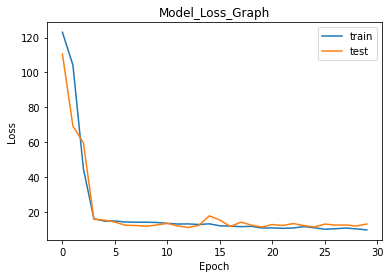

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


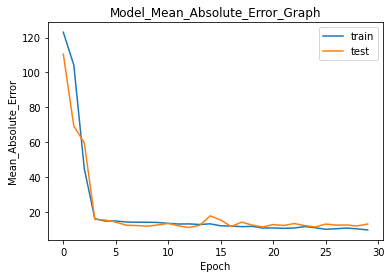

In [51]:
### Loss graph of the model
    
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model_Loss_Graph")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper_left')
plt.show()  

### MeanAbsoluteError graph of the model

plt.plot(model_history.history['mean_absolute_error'])
plt.plot(model_history.history['val_mean_absolute_error'])
plt.title("Model_Mean_Absolute_Error_Graph")
plt.ylabel('Mean_Absolute_Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper_left')
plt.show()


In [52]:
predictions = model.predict(x_test)

In [53]:
counter = 0
for predictt in predictions:
    print(predictt)
    counter = counter +1
    if counter == 100:
        break


[128.57605]
[136.37422]
[127.174805]
[127.7837]
[128.046]
[119.730225]
[136.3914]
[135.6874]
[126.98359]
[118.280525]
[150.64325]
[125.241684]
[132.93613]
[127.371216]
[128.89821]
[122.95997]
[135.56844]
[125.9224]
[124.13707]
[138.31175]
[122.8632]
[126.08416]
[127.22804]
[122.515015]
[128.55779]
[124.12128]
[121.46597]
[138.53784]
[150.5477]
[127.65233]
[128.6112]
[125.27044]
[127.08674]
[105.35939]
[121.82091]
[128.99124]
[121.66562]
[124.83657]
[123.76347]
[125.59133]
[127.32716]
[129.72157]
[129.63628]
[126.98324]
[124.90769]
[125.86283]
[132.19736]
[126.615746]
[125.891045]
[118.90543]
[126.27132]
[133.14488]
[134.88231]
[122.22914]
[123.1483]
[131.79845]
[126.68098]
[124.67388]
[127.606705]
[127.94183]
[124.252945]
[132.3364]
[122.77558]
[127.08338]
[122.42256]
[117.89031]
[124.323784]
[124.15839]
[127.16879]
[133.2876]
[125.19512]
[124.04768]
[126.96959]
[123.34334]
[141.54454]
[126.28813]
[126.38555]
[124.11791]
[129.11067]
[134.90825]
[132.89084]
[151.61761]
[125.12187]
[125.

In [54]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df, final_predict2, test_size = 0.15, random_state = 455)


In [55]:
x_train

,age,gender,height,weight,smoke,alco,active,latitude,longitude,matched_heading,matched_latitude,matched_link_id,matched_longitude,properties/O/EngineCoolantTemp,properties/O/FuelLevelRaw,properties/O/VehicleInteriorTemperature,properties/O/distanceToEmpty,properties/O/engineRpm,properties/O/fuelRatio,properties/O/tcuAccuracy,properties/O/tcuBatteryVoltage,properties/O/tripStartLat,properties/O/tripStartLong,road_type,speed,direction,distance,heading,local_time_2020-07-15T09:24:16.000+05:30,local_time_2020-07-15T09:24:19.000+05:30,local_time_2020-07-15T09:24:20.000+05:30,local_time_2020-07-15T09:28:40.000+05:30,local_time_2020-07-15T10:29:35.000+05:30,local_time_2020-07-15T10:29:38.000+05:30,local_time_2020-07-15T10:29:41.000+05:30,local_time_2020-07-15T10:29:44.000+05:30,local_time_2020-07-15T10:29:47.000+05:30,local_time_2020-07-15T10:29:50.000+05:30,local_time_2020-07-15T10:29:53.000+05:30,local_time_2020-07-15T10:29:56.000+05:30,...,local_time_2020-07-15T18:16:05.000+05:30,local_time_2020-07-15T18:16:08.000+05:30,local_time_2020-07-15T18:16:11.000+05:30,local_time_2020-07-15T18:16:14.000+05:30,local_time_2020-07-15T18:16:17.000+05:30,local_time_2020-07-15T18:16:20.000+05:30,local_time_2020-07-15T18:16:23.000+05:30,local_time_2020-07-15T18:16:26.000+05:30,local_time_2020-07-15T18:16:29.000+05:30,local_time_2020-07-15T18:16:32.000+05:30,local_time_2020-07-15T18:16:35.000+05:30,local_time_2020-07-15T18:16:38.000+05:30,local_time_2020-07-15T18:16:41.000+05:30,local_time_2020-07-15T18:16:44.000+05:30,local_time_2020-07-15T18:16:47.000+05:30,local_time_2020-07-15T18:16:50.000+05:30,local_time_2020-07-15T18:16:53.000+05:30,local_time_2020-07-15T18:16:56.000+05:30,local_time_2020-07-15T18:16:59.000+05:30,local_time_2020-07-15T18:17:02.000+05:30,local_time_2020-07-15T18:17:05.000+05:30,local_time_2020-07-15T18:17:08.000+05:30,local_time_2020-07-15T18:17:11.000+05:30,local_time_2020-07-15T18:17:14.000+05:30,local_time_2020-07-15T18:17:17.000+05:30,local_time_2020-07-15T18:17:20.000+05:30,local_time_2020-07-15T18:18:22.000+05:30,local_time_2020-07-15T19:08:47.000+05:30,local_time_2020-07-15T19:09:21.000+05:30,properties/L/Aircon_ACStatus_Front_ON,properties/L/Brake_ParkingBrake (IG1PullUp)_ON,properties/L/MeterIndicator_ABS_ON,properties/L/SeatbeltStatus_DR_ON,properties/O/fuelMode_Normal mode,properties/O/fuelMode_Not fixed yet,properties/O/fuelMode_Refuel mode,properties/O/meterIndicatorLowFuel_ON,properties/O/tcuAcc_ON,properties/O/tcuIgnitionStatus_ON,properties/O/tripStatus_ON
1108,23373,2,170,69.0,0,0,1,12.71217,77.88785,123.675507,12.712145,203502628,77.887833,79,1.171875,24,519,1658,92,2.0,14.9,12.712362,77.891727,3,56.290001,1,59.008789,127.199997,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1385,23368,1,161,71.0,0,0,1,12.71634,77.88109,105.741760,12.716339,203502635,77.881090,82,1.152344,20,536,1329,97,2.0,14.9,12.712362,77.891727,3,29.530001,1,15.640633,106.800003,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
283,21833,2,176,82.0,0,0,1,12.71209,77.89152,73.947441,12.711836,203502621,77.891597,60,0.449219,31,546,810,100,10.0,14.9,12.711893,77.891811,3,0.000000,1,125.422318,71.400002,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
375,15383,2,170,69.0,0,0,0,12.71221,77.89145,106.242645,12.712423,72361541,77.891513,68,0.449219,31,545,740,100,5.0,14.9,12.711893,77.891811,5,0.000000,2,83.503876,154.399994,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
26,19559,1,156,59.0,0,0,1,12.71219,77.89129,286.242645,12.712461,72361541,77.891380,46,4.121094,25,0,1110,0,7.0,14.9,12.711846,77.891636,5,0.000000,1,126.131416,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [56]:
y_train

1108    80
1385    80
283     90
375     80
26      90
        ..
1051    80
392     80
421     90
1168    80
789     70
Name: ap_lo, Length: 1233, dtype: int64

In [57]:
from sklearn.preprocessing import MinMaxScaler
Standard_Scale = MinMaxScaler()
x_train = Standard_Scale.fit_transform(x_train)
x_test = Standard_Scale.transform(x_test)


In [58]:
x_train[0]

array([0.97155737, 1.        , 0.78991597, ..., 1.        , 1.        ,
       1.        ])

In [59]:
y_train[0]

80

In [60]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=(1489,)))

model2.add(tf.keras.layers.Dense(700, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.95))

model2.add(tf.keras.layers.Dense(700, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.95))
model2.add(tf.keras.layers.Dropout(0.20))

model2.add(tf.keras.layers.Dense(810, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.96))
model2.add(tf.keras.layers.Dropout(0.20))

model2.add(tf.keras.layers.Dense(1440, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model2.add(tf.keras.layers.Dropout(0.20))

model2.add(tf.keras.layers.Dense(1440, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model2.add(tf.keras.layers.Dropout(0.30))

model2.add(tf.keras.layers.Dense(1440, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model2.add(tf.keras.layers.Dropout(0.40))

model2.add(tf.keras.layers.Dense(2440, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model2.add(tf.keras.layers.Dropout(0.20))

model2.add(tf.keras.layers.Dense(2440, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model2.add(tf.keras.layers.Dropout(0.30))

model2.add(tf.keras.layers.Dense(2440, kernel_initializer='he_normal'))
model2.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model2.add(tf.keras.layers.Dropout(0.40))

model2.add(tf.keras.layers.Dense(1, activation = 'linear'))
model2.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 700)               1043000   
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 700)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 700)               2800      
_________________________________________________________________
dense_11 (Dense)             (None, 700)               490700    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 700)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 700)               2800      
_________________________________________________________________
dropout_8 (Dropout)          (None, 700)              

In [61]:

model2.compile(loss = 'mean_absolute_error', optimizer = keras.optimizers.Nadam(learning_rate = 0.001), metrics = ['mean_absolute_error'])



In [62]:
model_history2 = model2.fit(x_train, y_train, epochs = 30, batch_size = 12, validation_split = 0.15)

Epoch 1/30
88/88 [==============================] - 7s 31ms/step - loss: 93.0667 - mean_absolute_error: 93.0667 - val_loss: 77.1069 - val_mean_absolute_error: 77.1069
Epoch 2/30
88/88 [==============================] - 2s 27ms/step - loss: 72.7546 - mean_absolute_error: 72.7546 - val_loss: 34.6063 - val_mean_absolute_error: 34.6063
Epoch 3/30
88/88 [==============================] - 3s 29ms/step - loss: 31.0819 - mean_absolute_error: 31.0819 - val_loss: 22.5317 - val_mean_absolute_error: 22.5317
Epoch 4/30
88/88 [==============================] - 2s 27ms/step - loss: 18.6896 - mean_absolute_error: 18.6896 - val_loss: 22.4268 - val_mean_absolute_error: 22.4268
Epoch 5/30
88/88 [==============================] - 2s 27ms/step - loss: 25.4955 - mean_absolute_error: 25.4955 - val_loss: 18.6679 - val_mean_absolute_error: 18.6679
Epoch 6/30
88/88 [==============================] - 2s 27ms/step - loss: 19.5415 - mean_absolute_error: 19.5415 - val_loss: 19.3348 - val_mean_absolute_error: 19.334

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


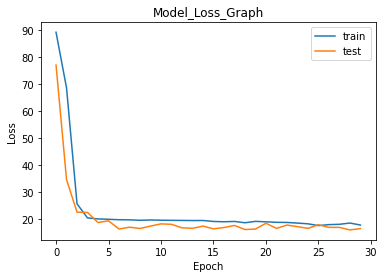

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


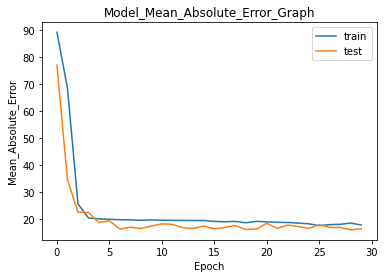

In [63]:
### Loss graph of the model
    
plt.plot(model_history2.history['loss'])
plt.plot(model_history2.history['val_loss'])
plt.title("Model_Loss_Graph")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper_left')
plt.show()  

### MeanAbsoluteError graph of the model

plt.plot(model_history2.history['mean_absolute_error'])
plt.plot(model_history2.history['val_mean_absolute_error'])
plt.title("Model_Mean_Absolute_Error_Graph")
plt.ylabel('Mean_Absolute_Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper_left')
plt.show()


In [64]:
predictions = model2.predict(x_test)

In [ ]:
type(predictions)

In [65]:
counter2 = 0
for predictt in predictions:
    print(predictt)
    counter2 = counter2 +1
    if counter2 == 100:
        break


[86.169815]
[84.89943]
[74.841835]
[80.36453]
[86.65485]
[80.346]
[85.2347]
[80.77587]
[79.10085]
[73.74757]
[97.86613]
[81.98456]
[86.4537]
[80.66771]
[82.25107]
[88.73571]
[85.98378]
[80.72549]
[79.675995]
[93.4364]
[80.23187]
[81.19526]
[82.201775]
[74.250946]
[92.23636]
[80.448235]
[81.04774]
[80.13688]
[89.87373]
[66.72553]
[81.582466]
[79.98314]
[80.30546]
[68.35973]
[79.55804]
[80.85339]
[80.195816]
[81.53432]
[80.100876]
[80.43322]
[80.433136]
[80.372444]
[81.4712]
[82.2193]
[80.040474]
[84.60276]
[89.55417]
[80.04121]
[80.216125]
[73.58749]
[80.423546]
[88.70989]
[80.90629]
[80.40128]
[80.48512]
[88.64418]
[87.727264]
[80.58179]
[87.95027]
[80.70608]
[80.125786]
[79.990776]
[79.44909]
[86.85755]
[80.087296]
[70.416336]
[80.249275]
[79.646]
[80.32737]
[84.92509]
[80.450615]
[80.66828]
[93.291664]
[80.423836]
[88.19788]
[80.19819]
[79.56311]
[81.27436]
[81.01708]
[86.98348]
[80.636986]
[81.44707]
[80.574554]
[76.68854]
[72.24081]
[80.68666]
[80.09187]
[75.9983]
[97.242966]
[79.3

In [68]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df, final_predict3, test_size = 0.15, random_state = 455)


In [69]:
x_train

,age,gender,height,weight,smoke,alco,active,latitude,longitude,matched_heading,matched_latitude,matched_link_id,matched_longitude,properties/O/EngineCoolantTemp,properties/O/FuelLevelRaw,properties/O/VehicleInteriorTemperature,properties/O/distanceToEmpty,properties/O/engineRpm,properties/O/fuelRatio,properties/O/tcuAccuracy,properties/O/tcuBatteryVoltage,properties/O/tripStartLat,properties/O/tripStartLong,road_type,speed,direction,distance,heading,local_time_2020-07-15T09:24:16.000+05:30,local_time_2020-07-15T09:24:19.000+05:30,local_time_2020-07-15T09:24:20.000+05:30,local_time_2020-07-15T09:28:40.000+05:30,local_time_2020-07-15T10:29:35.000+05:30,local_time_2020-07-15T10:29:38.000+05:30,local_time_2020-07-15T10:29:41.000+05:30,local_time_2020-07-15T10:29:44.000+05:30,local_time_2020-07-15T10:29:47.000+05:30,local_time_2020-07-15T10:29:50.000+05:30,local_time_2020-07-15T10:29:53.000+05:30,local_time_2020-07-15T10:29:56.000+05:30,...,local_time_2020-07-15T18:16:05.000+05:30,local_time_2020-07-15T18:16:08.000+05:30,local_time_2020-07-15T18:16:11.000+05:30,local_time_2020-07-15T18:16:14.000+05:30,local_time_2020-07-15T18:16:17.000+05:30,local_time_2020-07-15T18:16:20.000+05:30,local_time_2020-07-15T18:16:23.000+05:30,local_time_2020-07-15T18:16:26.000+05:30,local_time_2020-07-15T18:16:29.000+05:30,local_time_2020-07-15T18:16:32.000+05:30,local_time_2020-07-15T18:16:35.000+05:30,local_time_2020-07-15T18:16:38.000+05:30,local_time_2020-07-15T18:16:41.000+05:30,local_time_2020-07-15T18:16:44.000+05:30,local_time_2020-07-15T18:16:47.000+05:30,local_time_2020-07-15T18:16:50.000+05:30,local_time_2020-07-15T18:16:53.000+05:30,local_time_2020-07-15T18:16:56.000+05:30,local_time_2020-07-15T18:16:59.000+05:30,local_time_2020-07-15T18:17:02.000+05:30,local_time_2020-07-15T18:17:05.000+05:30,local_time_2020-07-15T18:17:08.000+05:30,local_time_2020-07-15T18:17:11.000+05:30,local_time_2020-07-15T18:17:14.000+05:30,local_time_2020-07-15T18:17:17.000+05:30,local_time_2020-07-15T18:17:20.000+05:30,local_time_2020-07-15T18:18:22.000+05:30,local_time_2020-07-15T19:08:47.000+05:30,local_time_2020-07-15T19:09:21.000+05:30,properties/L/Aircon_ACStatus_Front_ON,properties/L/Brake_ParkingBrake (IG1PullUp)_ON,properties/L/MeterIndicator_ABS_ON,properties/L/SeatbeltStatus_DR_ON,properties/O/fuelMode_Normal mode,properties/O/fuelMode_Not fixed yet,properties/O/fuelMode_Refuel mode,properties/O/meterIndicatorLowFuel_ON,properties/O/tcuAcc_ON,properties/O/tcuIgnitionStatus_ON,properties/O/tripStatus_ON
1108,23373,2,170,69.0,0,0,1,12.71217,77.88785,123.675507,12.712145,203502628,77.887833,79,1.171875,24,519,1658,92,2.0,14.9,12.712362,77.891727,3,56.290001,1,59.008789,127.199997,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1385,23368,1,161,71.0,0,0,1,12.71634,77.88109,105.741760,12.716339,203502635,77.881090,82,1.152344,20,536,1329,97,2.0,14.9,12.712362,77.891727,3,29.530001,1,15.640633,106.800003,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
283,21833,2,176,82.0,0,0,1,12.71209,77.89152,73.947441,12.711836,203502621,77.891597,60,0.449219,31,546,810,100,10.0,14.9,12.711893,77.891811,3,0.000000,1,125.422318,71.400002,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
375,15383,2,170,69.0,0,0,0,12.71221,77.89145,106.242645,12.712423,72361541,77.891513,68,0.449219,31,545,740,100,5.0,14.9,12.711893,77.891811,5,0.000000,2,83.503876,154.399994,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
26,19559,1,156,59.0,0,0,1,12.71219,77.89129,286.242645,12.712461,72361541,77.891380,46,4.121094,25,0,1110,0,7.0,14.9,12.711846,77.891636,5,0.000000,1,126.131416,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [70]:
y_train

1108    1
1385    1
283     1
375     1
26      0
       ..
1051    0
392     1
421     0
1168    1
789     1
Name: cardio, Length: 1233, dtype: int64

In [71]:
from sklearn.preprocessing import RobustScaler
Standard_Scale = RobustScaler()
x_train = Standard_Scale.fit_transform(x_train)
x_test = Standard_Scale.transform(x_test)


In [72]:
x_train

array([[ 0.96628332,  1.        ,  0.45454545, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.96497648,  0.        , -0.36363636, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56377418,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.78802927,  0.        , -0.54545455, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06664924,  0.        , -0.18181818, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57867224,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
y_train

1108    1
1385    1
283     1
375     1
26      0
       ..
1051    0
392     1
421     0
1168    1
789     1
Name: cardio, Length: 1233, dtype: int64

In [75]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.Input(shape=(1489,)))

model3.add(tf.keras.layers.Dense(800, kernel_initializer='he_normal'))
model3.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.95))

model3.add(tf.keras.layers.Dense(800, kernel_initializer='he_normal'))
model3.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.95))
model3.add(tf.keras.layers.Dropout(0.20))

model3.add(tf.keras.layers.Dense(810, kernel_initializer='he_normal'))
model3.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.96))
model3.add(tf.keras.layers.Dropout(0.20))

model3.add(tf.keras.layers.Dense(1440, kernel_initializer='he_normal'))
model3.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model3.add(tf.keras.layers.Dropout(0.20))

model3.add(tf.keras.layers.Dense(1440, kernel_initializer='he_normal'))
model3.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model3.add(tf.keras.layers.Dropout(0.30))

model3.add(tf.keras.layers.Dense(1440, kernel_initializer='he_normal'))
model3.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.98))
model3.add(tf.keras.layers.Dropout(0.40))

model3.add(tf.keras.layers.Dense(1680, kernel_initializer='he_normal'))
model3.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.75))
model3.add(tf.keras.layers.Dropout(0.20))

model3.add(tf.keras.layers.Dense(1680, kernel_initializer='he_normal'))
model3.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.75))
model3.add(tf.keras.layers.Dropout(0.30))

model3.add(tf.keras.layers.Dense(1680, kernel_initializer='he_normal'))
model3.add(tf.keras.layers.LeakyReLU(alpha = 0.05))
model3.add(tf.keras.layers.BatchNormalization(momentum=0.75))
model3.add(tf.keras.layers.Dropout(0.40))

model3.add(tf.keras.layers.Dense(1, activation = 'linear'))
model3.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 800)               1192000   
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 800)               0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 800)               3200      
_________________________________________________________________
dense_21 (Dense)             (None, 800)               640800    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 800)               0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 800)               3200      
_________________________________________________________________
dropout_16 (Dropout)         (None, 800)              

In [76]:

model3.compile(loss = 'mean_absolute_error', 
               optimizer = keras.optimizers.SGD(learning_rate = 0.001), 
               metrics = ['mean_absolute_error'])



In [77]:
model_history3 = model3.fit(x_train, y_train, epochs = 30, batch_size = 12, validation_split = 0.15)

Epoch 1/30
88/88 [==============================] - 3s 13ms/step - loss: 1.4834 - mean_absolute_error: 1.4834 - val_loss: 0.9773 - val_mean_absolute_error: 0.9773
Epoch 2/30
88/88 [==============================] - 1s 11ms/step - loss: 1.4597 - mean_absolute_error: 1.4597 - val_loss: 0.8608 - val_mean_absolute_error: 0.8608
Epoch 3/30
88/88 [==============================] - 1s 9ms/step - loss: 1.2972 - mean_absolute_error: 1.2972 - val_loss: 0.8165 - val_mean_absolute_error: 0.8165
Epoch 4/30
88/88 [==============================] - 1s 9ms/step - loss: 1.2526 - mean_absolute_error: 1.2526 - val_loss: 0.6700 - val_mean_absolute_error: 0.6700
Epoch 5/30
88/88 [==============================] - 1s 9ms/step - loss: 1.1464 - mean_absolute_error: 1.1464 - val_loss: 0.7540 - val_mean_absolute_error: 0.7540
Epoch 6/30
88/88 [==============================] - 1s 9ms/step - loss: 1.0966 - mean_absolute_error: 1.0966 - val_loss: 0.5676 - val_mean_absolute_error: 0.5676
Epoch 7/30
88/88 [========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


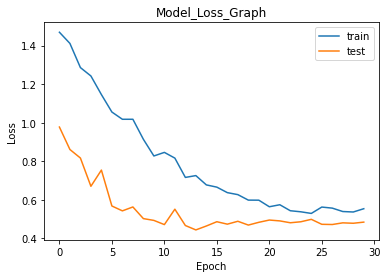

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


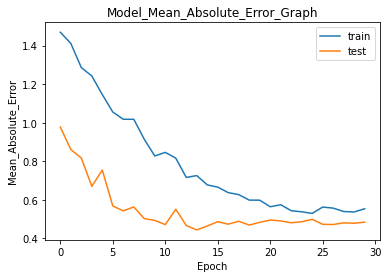

In [78]:
### Loss graph of the model
    
plt.plot(model_history3.history['loss'])
plt.plot(model_history3.history['val_loss'])
plt.title("Model_Loss_Graph")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper_left')
plt.show()  

### MeanAbsoluteError graph of the model

plt.plot(model_history3.history['mean_absolute_error'])
plt.plot(model_history3.history['val_mean_absolute_error'])
plt.title("Model_Mean_Absolute_Error_Graph")
plt.ylabel('Mean_Absolute_Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper_left')
plt.show()


In [79]:
predictions = model3.predict(x_test)


In [80]:
predictions = (predictions > 0.5)

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[70, 37],
       [60, 51]])

In [82]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score


0.555045871559633

In [83]:
counter3 = 0
for predictt in predictions:
    print(predictt)
    counter3 = counter3 +1
    if counter3 == 100:
        break


[False]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[False]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[False]
[False]
[ True]
[False]
[False]
[False]
[ True]
[False]
[ True]
[False]
[ True]
[False]
[ True]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[False]
[False]
[False]
[False]
[ True]
[ True]
[False]
[False]
[False]
[False]
[False]
[ True]
[ True]
[ True]
[False]
[False]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[False]
[False]
[False]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]
[ True]
[ True]
[ True]
[False]
[False]
[False]
[False]
